In [1]:
# Creating PCA plot for the SIEDS Paper
# Catherine Beazley

In [2]:
import pandas as pd
import numpy as np
from copy import deepcopy
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import time

In [3]:
# Reading a clean, 10 million row subset of the data I previously created and saved into a csv 
start = time.time()
df = pd.read_csv('RepSamp_10million_with_packet_clusters.csv')
end = time.time()
print(end - start)

52.14760112762451


In [4]:
df["PacketClusterAssignment"] = df["PacketClusterAssignment"].astype("category")

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Time,Duration,SrcDevice,DstDevice,Protocol,SrcPort,DstPort,SrcPackets,DstPackets,SrcBytes,DstBytes,PacketClusterAssignment
0,0,131410524,132279050,225980,1,Comp296454,Comp758181,6,Port25577,Port62256,1.000000e-22,1,0,46,0.0
1,1,26010083,26144658,184672,1,Comp044772,Comp363591,6,Port68183,Port04318,1.000000e-22,1,0,46,0.0
2,2,98667612,99295114,213261,917,Comp434108,Comp392461,6,Port82403,443,1.200000e+01,13,1951,1040,1.0
3,3,41707255,41917983,191138,0,Comp733964,Comp576843,6,Port91294,80,5.000000e+00,0,400,0,2.0
4,4,116324195,117066122,219901,1,Comp684171,Comp275646,17,Port79804,53,1.000000e+00,0,65,0,2.0


In [6]:
# Some packet values are less than 1 and greater than 0 so cleaning that
df["SrcPackets"].loc[df["SrcPackets"] <1]=0

/apps/software/standard/core/anaconda/5.2.0-py3.6/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
print(set(df["SrcPackets"][df["SrcPackets"] <1]))
print(set(df["DstPackets"][df["DstPackets"] <1]))
print(set(df["SrcBytes"][df["SrcBytes"] <1]))
print(set(df["DstBytes"][df["DstBytes"] <1]))

{0.0}
{0}
{0}
{0}


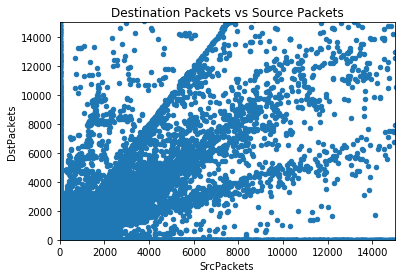

72.58399200439453


<Figure size 432x288 with 0 Axes>

In [8]:
start = time.time()
df.plot(x="SrcPackets", y="DstPackets", kind='scatter', title='Destination Packets vs Source Packets')
plt.xlim([0, 15000])
plt.ylim([-3, 15000])
plt.show()
plt.savefig("DstPackets_vs_SrcPackets_10mill_Raw.pdf")
end = time.time()
print(end - start)

In [8]:
# Taking Log of all Numerical Columns
start = time.time()
df["Duration"].loc[df["Duration"] >= 1] = np.log(df["Duration"][df["Duration"] >= 1])
df["SrcPackets"].loc[df["SrcPackets"] >= 1] = np.log(df["SrcPackets"][df["SrcPackets"] >= 1])
df["DstPackets"].loc[df["DstPackets"] >= 1] = np.log(df["DstPackets"][df["DstPackets"] >= 1])
df["SrcBytes"].loc[df["SrcBytes"] >= 1] = np.log(df["SrcBytes"][df["SrcBytes"] >= 1])
df["DstBytes"].loc[df["DstBytes"] >= 1] = np.log(df["DstBytes"][df["DstBytes"] >= 1])
end = time.time()
print(end - start)

/apps/software/standard/core/anaconda/5.2.0-py3.6/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


10.963882207870483


In [9]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Time,Duration,SrcDevice,DstDevice,Protocol,SrcPort,DstPort,SrcPackets,DstPackets,SrcBytes,DstBytes,PacketClusterAssignment
0,0,131410524,132279050,225980,0.000000,Comp296454,Comp758181,6,Port25577,Port62256,0.000000,0.000000,0.000000,3.828641,0.0
1,1,26010083,26144658,184672,0.000000,Comp044772,Comp363591,6,Port68183,Port04318,0.000000,0.000000,0.000000,3.828641,0.0
2,2,98667612,99295114,213261,6.821107,Comp434108,Comp392461,6,Port82403,443,2.484907,2.564949,7.576097,6.946976,1.0
3,3,41707255,41917983,191138,0.000000,Comp733964,Comp576843,6,Port91294,80,1.609438,0.000000,5.991465,0.000000,2.0
4,4,116324195,117066122,219901,0.000000,Comp684171,Comp275646,17,Port79804,53,0.000000,0.000000,4.174387,0.000000,2.0


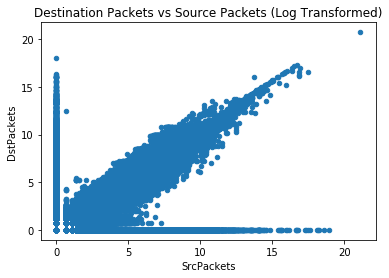

79.52202343940735


<Figure size 432x288 with 0 Axes>

In [10]:
start = time.time()
df.plot(x="SrcPackets", y="DstPackets", kind='scatter', title='Destination Packets vs Source Packets (Log Transformed)')
plt.show()
plt.savefig("DstPackets_vs_SrcPackets_10mill_LogTransformed.pdf")
end = time.time()
print(end - start)

In [11]:
# Scaling for PCA
start = time.time()
pre = preprocessing.scale(df[["Duration", "SrcPackets", "DstPackets", "SrcBytes", "DstBytes"]])
pre = pd.DataFrame.from_records(pre, columns = ["Duration", "SrcPackets", "DstPackets", "SrcBytes", "DstBytes"])
pre['Protocol'] = df["Protocol"].values
pre.head()
end = time.time()
print(end - start)

28.3784077167511


In [ ]:
# PCA plot of just numerical values-- color coded
start = time.time()
pcaDF = pre[["Duration", "SrcPackets", "DstPackets", "SrcBytes", "DstBytes"]]
pca = PCA(n_components=2).fit_transform(pcaDF)
pcdf = pd.DataFrame(data = pca, columns = ['PC1', 'PC2'])
pcdf.plot(x="PC1", y="PC2", kind='scatter', title='PCA Plot (Color Coded by DstPackets/SrcPackets Cluster Assignment)', 
          c=df["PacketClusterAssignment"], legend=True, colormap = 'Accent', alpha = 0.25)
plt.savefig('PCA_Day3_10mill_numerical_colored_by_packet_cluster.pdf')
plt.show()
end = time.time()
print(end - start)

In [ ]:
# PCA plot of just numerical values-- NOT color coded
start = time.time()
pcaDF = pre[["Duration", "SrcPackets", "DstPackets", "SrcBytes", "DstBytes"]]
pca = PCA(n_components=2).fit_transform(pcaDF)
pcdf = pd.DataFrame(data = pca, columns = ['PC1', 'PC2'])
pcdf.plot(x="PC1", y="PC2", kind='scatter', title='PCA Plot')
plt.savefig('PCA_Day3_10mill_numerical_not_colored.pdf')
plt.show()
end = time.time()
print(end - start)

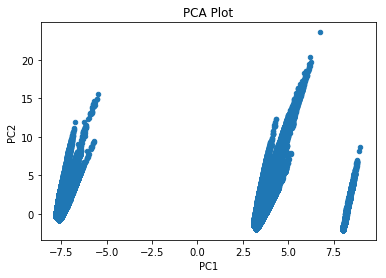

802.6617796421051


In [11]:
# PCA plot of protocol and numerical values-- NOT color coded
start = time.time()
pcaDF = pre[["Duration", "SrcPackets", "DstPackets", "SrcBytes", "DstBytes", "Protocol"]]
pca = PCA(n_components=2).fit_transform(pcaDF)
pcdf = pd.DataFrame(data = pca, columns = ['PC1', 'PC2'])
pcdf.plot(x="PC1", y="PC2", kind='scatter', title='PCA Plot')
plt.savefig('PCA_Day3_10mill_ProtocolAndNumerical_not_colored.pdf')
plt.show()
end = time.time()
print(end - start)

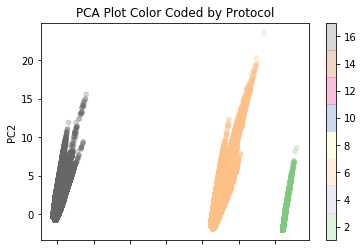

2176.973966360092


In [12]:
# PCA plot of protocol and numerical values-- color coded by Protocol
start = time.time()
pcaDF = pre[["Duration", "SrcPackets", "DstPackets", "SrcBytes", "DstBytes", "Protocol"]]
pca = PCA(n_components=2).fit_transform(pcaDF)
pcdf = pd.DataFrame(data = pca, columns = ['PC1', 'PC2'])
pcdf.plot(x="PC1", y="PC2", kind='scatter', title='PCA Plot Color Coded by Protocol', 
          c=df["Protocol"], legend=True, colormap = 'Accent', alpha = 0.25)
plt.savefig('PCA_Day3_10mill_ProtocolAndNumerical_colored_Protocol.pdf')
plt.show()
end = time.time()
print(end - start)

In [ ]:
# PCA plot of protocol and numerical values-- color coded by Cluster assignment for DstPackets/SrcPackets
start = time.time()
pcaDF = pre[["Duration", "SrcPackets", "DstPackets", "SrcBytes", "DstBytes", "Protocol"]]
pca = PCA(n_components=2).fit_transform(pcaDF)
pcdf = pd.DataFrame(data = pca, columns = ['PC1', 'PC2'])
pcdf.plot(x="PC1", y="PC2", kind='scatter', title='PCA Plot Color Coded by Cluster Assignment', 
          c=df["PacketClusterAssignment"], legend=True, colormap = 'Accent', alpha = 0.25)
plt.savefig('PCA_Day3_10mill_ProtocolAndNumerical_colored_Packet.pdf')
plt.show()
end = time.time()
print(end - start)

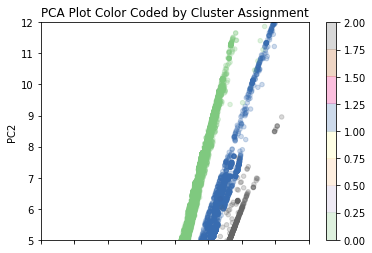

194.8221356868744


In [53]:
# PCA plot of protocol and numerical values-- color coded by Cluster assignment for DstPackets/SrcPackets-- Zoomed in on left cluster
start = time.time()
pcaDF = pre[["Duration", "SrcPackets", "DstPackets", "SrcBytes", "DstBytes", "Protocol"]]
pca = PCA(n_components=2).fit_transform(pcaDF)
pcdf = pd.DataFrame(data = pca, columns = ['PC1', 'PC2'])
pcdf.plot(x="PC1", y="PC2", kind='scatter', title='PCA Plot Color Coded by Cluster Assignment', 
          c=df["SlopeClusterAssign"], legend=True, colormap = 'Accent', alpha = 0.25)
plt.xlim([-9,-5])
plt.ylim([5,12])
plt.show()
end = time.time()
print(end - start)


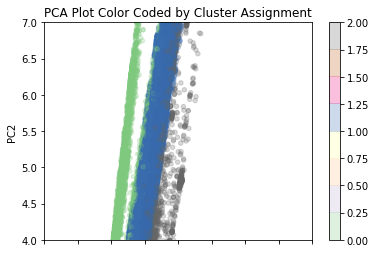

190.95119619369507


In [57]:
# PCA plot of protocol and numerical values-- color coded by Cluster assignment for DstPackets/SrcPackets-- 
# Zoomed in on center cluster
start = time.time()
pcaDF = pre[["Duration", "SrcPackets", "DstPackets", "SrcBytes", "DstBytes", "Protocol"]]
pca = PCA(n_components=2).fit_transform(pcaDF)
pcdf = pd.DataFrame(data = pca, columns = ['PC1', 'PC2'])
pcdf.plot(x="PC1", y="PC2", kind='scatter', title='PCA Plot Color Coded by Cluster Assignment', 
          c=df["SlopeClusterAssign"], legend=True, colormap = 'Accent', alpha = 0.25)
plt.xlim([3,7])
plt.ylim([4,7])
plt.show()
end = time.time()
print(end - start)

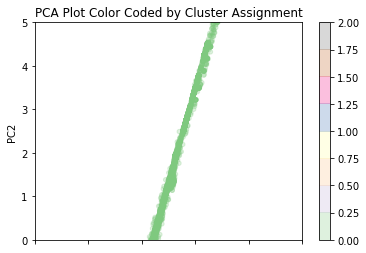

206.44795417785645


In [55]:
# PCA plot of protocol and numerical values-- color coded by Cluster assignment for DstPackets/SrcPackets-- 
# Zoomed in on right cluster
start = time.time()
pcaDF = pre[["Duration", "SrcPackets", "DstPackets", "SrcBytes", "DstBytes", "Protocol"]]
pca = PCA(n_components=2).fit_transform(pcaDF)
pcdf = pd.DataFrame(data = pca, columns = ['PC1', 'PC2'])
pcdf.plot(x="PC1", y="PC2", kind='scatter', title='PCA Plot Color Coded by Cluster Assignment', 
          c=df["SlopeClusterAssign"], legend=True, colormap = 'Accent', alpha = 0.25)
plt.xlim([7.5,10])
plt.ylim([0,5])
plt.show()
end = time.time()
print(end - start)